#**Homework 10**
###**by Markin Nikita and Aleksandr Zybin**

## Problem 1 ( Ex 10.7, p.386. Solve for coefficients of Boosted Tree Model)

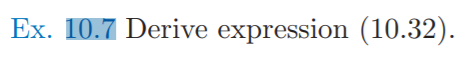

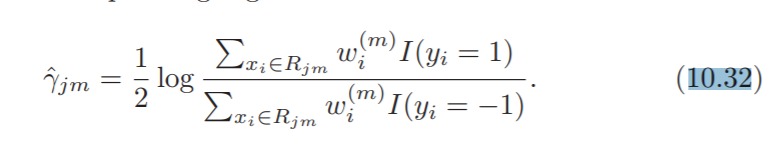

We are asked to derive the above eqution. In order to do that we should find the optimal $\gamma_{jm}$ in each tree region. By definition we have:

$$\hat\gamma_{jm}=argmin_{\gamma_{jm}} \sum_{x_i\in R_{jm}} L(y_i,f_{m-1}(x_i)+\gamma_{jm})$$

According to the book we have exponential loss function, so we rewrite equation as:

$$\hat\gamma_{jm}=argmin_{\gamma_{jm}} \sum_{x_i\in R_{jm}} e^{(-y_if_{m-1}(x_i)-y_i\gamma_{jm})}$$

Once again, acording to the book: $w_i^{(m)}=e^{-y_if_{m-1}(x_i)}$. 

So we substitute it in and get:

$$\hat\gamma_{jm}=argmin_{\gamma_{jm}} \sum_{x_i\in R_{jm}} w_i^{(m)}e^{-y_i\gamma_{jm}}$$

In order to minimise the function we should find its derivative, set it equal to zero and solve.

The derivative is:
$$(\sum_{x_i\in R_{jm}} w_i^{(m)}e^{-y_i\gamma_{jm}})^{'} = \sum_{x_i\in R_{jm}} (-y_i)w_i^{(m)}e^{-y_i\gamma_{jm}}$$

Set it equal to zero to solve:
$$\sum_{x_i\in R_{jm}} (-y_i)w_i^{(m)}e^{-y_i\gamma_{jm}} = 0$$

The formula we are deriving makes use of the Indicator functions. Here we can notice that we can also use them by splitting the sum into two parts as follows:

$$-\sum_{x_i\in R_{jm}} w_i^{(m)}e^{-\gamma_{jm}}I(y_i = 1) + \sum_{x_i\in R_{jm}} w_i^{(m)}e^{\gamma_{jm}} I(y_i = -1)=0$$

Rewrite in different form:

$$\sum_{x_i\in R_{jm}} w_i^{(m)}e^{\gamma_{jm}} I(y_i = -1)= \sum_{x_i\in R_{jm}} w_i^{(m)}e^{-\gamma_{jm}}I(y_i = 1) $$

Now multiply both parts by $e^{\gamma_{jm}}$

$$e^{2\gamma_{jm}}\sum_{x_i\in R_{jm}} w_i^{(m)} I(y_i = -1)= \sum_{x_i\in R_{jm}} w_i^{(m)}I(y_i = 1) $$

Rewrite as:

$$e^{2\gamma_{jm}}=\frac{\sum_{x_i\in R_{jm}} w_i^{(m)}I(y_i = 1)}{\sum_{x_i\in R_{jm}} w_i^{(m)} I(y_i = -1)} $$

Taking $log$ of both parts:
$$2\gamma_{jm}=log(\frac{\sum_{x_i\in R_{jm}} w_i^{(m)}I(y_i = 1)}{\sum_{x_i\in R_{jm}} w_i^{(m)} I(y_i = -1)})$$

Finally we get the wished result:
$$\gamma_{jm}=\frac{1}{2}log(\frac{\sum_{x_i\in R_{jm}} w_i^{(m)}I(y_i = 1)}{\sum_{x_i\in R_{jm}} w_i^{(m)} I(y_i = -1)}) $$

## Problem 2 (Ex 10.4, p.385. Implement and apply AdaBoost Algorithm)

### (a) Write a program implementing AdaBoost with trees.

In [ ]:
install.packages("data.table", quiet=TRUE)
install.packages("rpart")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("data.table")
library("rpart")
library("ggplot2")

#### Data Generation

In [ ]:
set.seed(10)
df <- data.table()
for (i in 1:10) {
  df[,paste0("X",i)] <- rnorm(12000,0,1)
}
df$Y <- as.numeric(ifelse(rowSums(df**2)>9.34,1,-1))

#### AdaBoost Model with trees 

In [ ]:
train_error <- c()
test_error <- c()
pred_df_train <- data.table()
pred_df_test <- data.table()
alpha_df <- data.table()

data <- df

train <- sample(nrow(data),round(nrow(data)/6,0))

df_train <- data[train,]
df_test <- data[-train,]

y_train <- data[train,]$Y
X_train <- data[train,-which(names(df)=="Y"),with=FALSE]

y_test <- data[-train,]$Y
X_test <- data[-train,-which(names(df)=="Y"),with=FALSE]

weight_train <- rep(1/nrow(df_train),nrow(df_train))

j=100

for (i in 1:j){
  f_tree <- rpart(y_train~., X_train, weight_train, method="class", maxdepth=1)
  y_pred_train <- ifelse(predict(f_tree,X_train)[,2]>0.5,1,-1)
  pred_df_train[,paste0("y_pred_train",i)] <- y_pred_train
  y_pred_test <- ifelse(predict(f_tree,X_test)[,2]>0.5,1,-1)
  pred_df_test[,paste0("y_pred_test",i)] <- y_pred_test
  err_train <- sum(weight_train*(y_pred_train!=y_train))/sum(weight_train)
  alpha_train <- log((1-err_train)/err_train)
  alpha_df[,paste0("alpha_train",i)] <- alpha_train*y_pred_test
  weight_train <- weight_train*exp(alpha_train*(y_pred_train!=y_train))
}

### (b) Redo the computations for the example of Figure 10.2. Plot the training error as well as test error, and discuss its behavior.
Note: Due to computational complexity it was reasonable to reduce the size of the dataset to 1200 observations in (b), (c), and (d).

In [ ]:
set.seed(10)
df <- data.table()
for (i in 1:10) {
  df[,paste0("X",i)] <- rnorm(1200,0,1)
}
df$Y <- as.numeric(ifelse(rowSums(df**2)>9.34,1,-1))

error_test <- c()
error_train <- c()

iter <- 400
#AdaBoost with trees:
for (j in 1:iter){
train_error <- c()
test_error <- c()

data <- df

train <- sample(nrow(data),round(nrow(data)/6,0))

df_train <- data[train,]
df_test <- data[-train,]

y_train <- data[train,]$Y
X_train <- data[train,-which(names(df)=="Y"),with=FALSE]

y_test <- data[-train,]$Y
X_test <- data[-train,-which(names(df)=="Y"),with=FALSE]

weight_train <- rep(1/nrow(df_train),nrow(df_train))

pred_df_train <- data.table()
pred_df_test <- data.table()
alpha_df <- data.table()
alpha_df_train <- data.table()

for (i in 1:j){
  f_tree <- rpart(y_train~., X_train, weight_train, method="class", maxdepth=1)
  y_pred_train <- ifelse(predict(f_tree,X_train)[,2]>0.5,1,-1)
  pred_df_train[,paste0("y_pred_train",i)] <- y_pred_train
  y_pred_test <- ifelse(predict(f_tree,X_test)[,2]>0.5,1,-1)
  pred_df_test[,paste0("y_pred_test",i)] <- y_pred_test
  err_train <- sum(weight_train*(y_pred_train!=y_train))/sum(weight_train)
  alpha_train <- log((1-err_train)/err_train)
  alpha_df[,paste0("alpha_train",i)] <- alpha_train*y_pred_test
  alpha_df_train[,paste0("alpha_test",i)] <- alpha_train*y_pred_train
  weight_train <- weight_train*exp(alpha_train*(y_pred_train!=y_train))
}
  error_test[j] <- mean(sign(rowSums(alpha_df))!=y_test)
  error_train[j] <- mean(sign(rowSums(alpha_df_train))!=y_train)
}


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



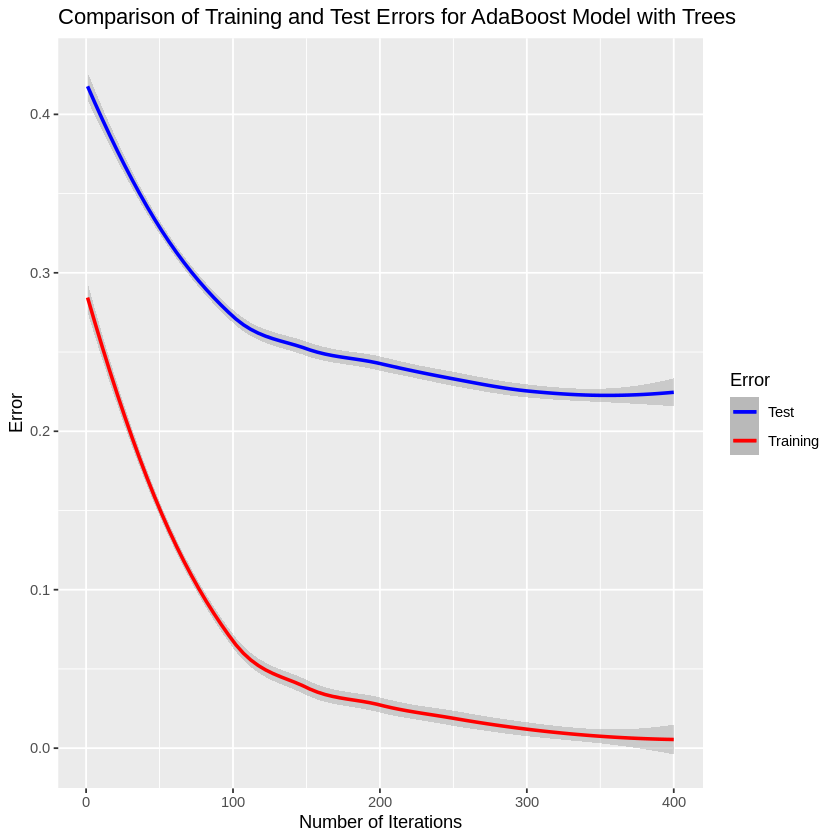

In [ ]:
plot_error <- data.frame(c(1:iter),error_test, error_train)
colnames(plot_error) <- c("iterations","Test_Error","Train_Error")

plt <- ggplot(data=plot_error) +
    geom_smooth(aes(x=iterations, y=Test_Error, col="blue")) +
    geom_smooth(aes(x=iterations, y=Train_Error, col="red")) +
    scale_color_manual(labels = c("Test", "Training"), values = c("blue", "red")) +
    labs(title = "Comparison of Training and Test Errors for AdaBoost Model with Trees", color="Error") + 
    xlab("Number of Iterations") + ylab("Error")

plt

Comments on the behaviour:
*   Both errors decrease assymtotically
*   Training error is at the higher level
*   Test error decreases faster than the training one





### (c) Investigate the number of iterations needed to make the test error ﬁnally start to rise.
Iterations over 400 take significant time to compute, but, overall, from (b) we can see that the train error tends to decreases with reasonably high number of iterations.

In [ ]:
set.seed(10)
df <- data.table()
for (i in 1:10) {
  df[,paste0("X",i)] <- rnorm(1200,0,1)
}
df$Y <- as.numeric(ifelse(rowSums(df**2)>9.34,1,-1))

error_test <- c()
error_train <- c()

iter <- 1000

#AdaBoost with trees:
for (j in 1:iter){
train_error <- c()
test_error <- c()

data <- df

train <- sample(nrow(data),round(nrow(data)/6,0))

df_train <- data[train,]
df_test <- data[-train,]

y_train <- data[train,]$Y
X_train <- data[train,-which(names(df)=="Y"),with=FALSE]

y_test <- data[-train,]$Y
X_test <- data[-train,-which(names(df)=="Y"),with=FALSE]

weight_train <- rep(1/nrow(df_train),nrow(df_train))

pred_df_train <- data.table()
pred_df_test <- data.table()
alpha_df <- data.table()
alpha_df_train <- data.table()

for (i in 1:j){
  f_tree <- rpart(y_train~., X_train, weight_train, method="class", maxdepth=1)
  y_pred_train <- ifelse(predict(f_tree,X_train)[,2]>0.5,1,-1)
  pred_df_train[,paste0("y_pred_train",i)] <- y_pred_train
  y_pred_test <- ifelse(predict(f_tree,X_test)[,2]>0.5,1,-1)
  pred_df_test[,paste0("y_pred_test",i)] <- y_pred_test
  err_train <- sum(weight_train*(y_pred_train!=y_train))/sum(weight_train)
  alpha_train <- log((1-err_train)/err_train)
  alpha_df[,paste0("alpha_train",i)] <- alpha_train*y_pred_test
  alpha_df_train[,paste0("alpha_test",i)] <- alpha_train*y_pred_train
  weight_train <- weight_train*exp(alpha_train*(y_pred_train!=y_train))
}
  error_test[j] <- mean(sign(rowSums(alpha_df))!=y_test)
  error_train[j] <- mean(sign(rowSums(alpha_df_train))!=y_train)
}

###(d)

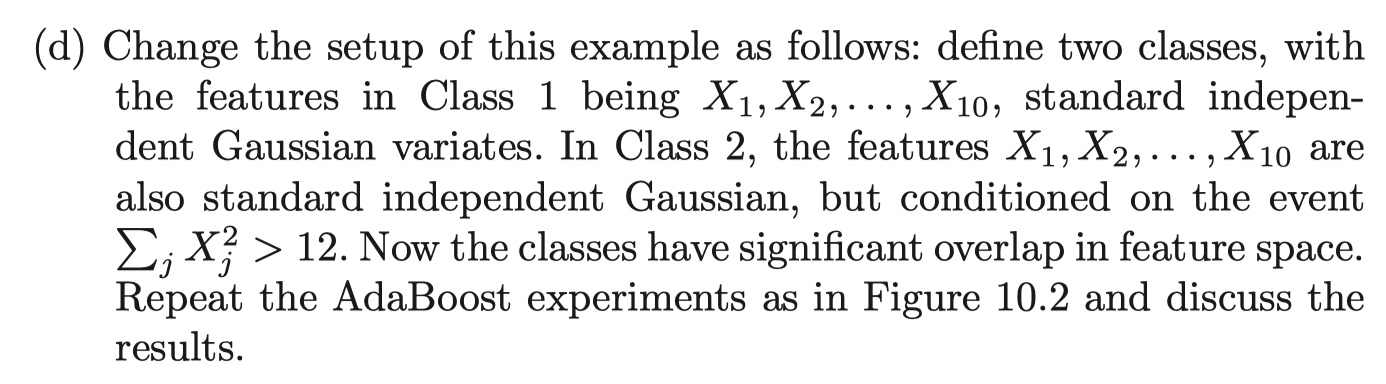

####Data Generation

In [ ]:
set.seed(10)
df1 <- data.table()
df2 <- data.table()

for (i in 1:10) {
  df1[,paste0("X",i)] <- rnorm(600,0,1)
}

for (i in 1:10) {
  df2[,paste0("X",i)] <- rnorm(600,0,1)
}

df1$Y <- as.numeric(ifelse(rowSums(df1**2)>9.34,1,-1))
df2$Y <- as.numeric(ifelse(rowSums(df2**2)>12,1,-1))

df_new <- rbind(df1,df2)

In [ ]:
set.seed(10)
iter <- 200
error_test <- c()
error_train <- c()
#AdaBoost with trees:
for (j in 1:iter){
train_error <- c()
test_error <- c()

data <- df_new

train <- sample(nrow(data),round(nrow(data)/6,0))

df_train <- data[train,]
df_test <- data[-train,]

y_train <- data[train,]$Y
X_train <- data[train,-which(names(data)=="Y"),with=FALSE]

y_test <- data[-train,]$Y
X_test <- data[-train,-which(names(data)=="Y"),with=FALSE]

weight_train <- rep(1/nrow(df_train),nrow(df_train))

pred_df_train <- data.table()
pred_df_test <- data.table()
alpha_df <- data.table()
alpha_df_train <- data.table()

for (i in 1:j){
  f_tree <- rpart(y_train~., X_train, weight_train, method="class", maxdepth=1)
  y_pred_train <- ifelse(predict(f_tree,X_train)[,2]>0.5,1,-1)
  pred_df_train[,paste0("y_pred_train",i)] <- y_pred_train
  y_pred_test <- ifelse(predict(f_tree,X_test)[,2]>0.5,1,-1)
  pred_df_test[,paste0("y_pred_test",i)] <- y_pred_test
  err_train <- sum(weight_train*(y_pred_train!=y_train))/sum(weight_train)
  alpha_train <- log((1-err_train)/err_train)
  alpha_df[,paste0("alpha_train",i)] <- alpha_train*y_pred_test
  alpha_df_train[,paste0("alpha_test",i)] <- alpha_train*y_pred_train
  weight_train <- weight_train*exp(alpha_train*(y_pred_train!=y_train))
}
  error_test[j] <- mean(sign(rowSums(alpha_df))!=y_test)
  error_train[j] <- mean(sign(rowSums(alpha_df_train))!=y_train)
}


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



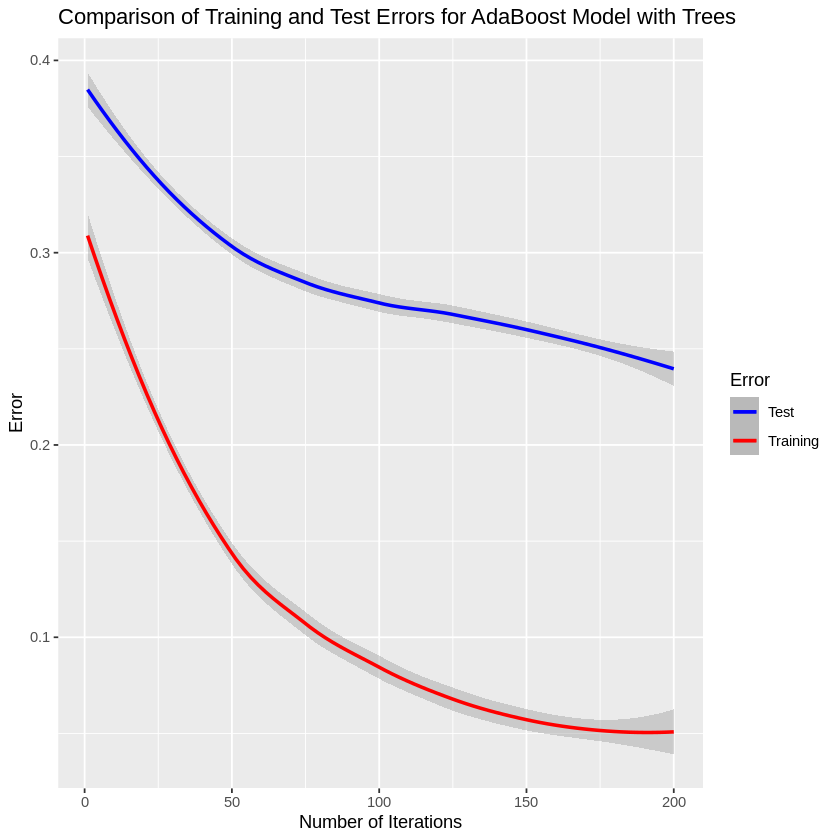

In [ ]:
plot_error <- data.frame(c(1:iter),error_test, error_train)
colnames(plot_error) <- c("iterations","Test_Error","Train_Error")

plt <- ggplot(data=plot_error) +
    geom_smooth(aes(x=iterations, y=Test_Error, col="blue")) +
    geom_smooth(aes(x=iterations, y=Train_Error, col="red")) +
    scale_color_manual(labels = c("Test", "Training"), values = c("blue", "red")) +
    labs(title = "Comparison of Training and Test Errors for AdaBoost Model with Trees", color="Error") + 
    xlab("Number of Iterations") + ylab("Error")

plt

There might be no significant change in the training error, but the test error tends to decrease slower. This might be due to the significant overlap in feature space. This overlap makes some kind of noise in the prediction space, which in turn leads to "misconfusion" of the classifier on the test sample.

It is also interesting to note that the gap between test and training error increases with the number of iterations.